# Exp 53-59 analysis

Several tests of the replicator opt method, comparing `num_replicators` to `num_iterations` (the number of replication events). Here, `metric=total_E`.

See `./informercial/Makefile` for full experimental details.

In [2]:
import os
import numpy as np

from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

from infomercial.exp import meta_bandit
from infomercial.local_gym import bandit
from infomercial.exp.meta_bandit import load_checkpoint

import gym

In [3]:
# ls ../data/exp2*

# Load and process data

In [5]:
data_path ="/Users/qualia/Code/infomercial/data/"
exp_names = ["exp53", "exp54", "exp55", 
             "exp56", "exp57", "exp58", 
             "exp59"]
num_iterations = [16, 2, 4, 
                  8, 16, 8, 
                 4]
num_replicators = [40, 400, 400,
                  400, 400, 40,
                  40]

best_params = []
ties = []
total_Es = []
lrs = []
for exp_name, i, r in zip(exp_names, num_iterations, num_replicators):
    best = load_checkpoint(os.path.join(data_path, f"{exp_name}_best.pkl"))
    
    best_params.append(best)
    ties.append(best["tie_threshold"])
    lrs.append(best["lr"])
    total_Es.append(best["total_E"])

In [9]:
ties, lrs, total_Es

([0.07024629597387025,
  0.007718153537453068,
  0.001969519206458025,
  0.009383899252538921,
  0.0019689062371460136,
  0.009272732601881432,
  0.032940967878595837],
 [0.25808687910003275,
  0.1614279017778434,
  0.010566186893614903,
  0.026491483253719313,
  0.0026347871766753592,
  0.3318698314514748,
  0.26228531939912914],
 [3.524718169614719,
  3.763114240643761,
  3.796695717609004,
  3.7302080870735224,
  3.806714078392016,
  3.7622026329922518,
  3.3776576630438973])

# Performance

of best parameters

In [10]:
env_name = 'BanditOneHigh10-v0'
num_episodes = 10*10

results = []
total_Rs
for best in best_params:
    # Run w/ best params
    result = meta_bandit(
        env_name=env_name,
        num_episodes=num_episodes, 
        lr=best["lr"], 
        tie_threshold=best["tie_threshold"],
        seed_value=129
    )
    results.append(result)
    total_Rs.append(result["total_R"])

/Users/qualia/anaconda3/envs/py3.6/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [11]:
total_Rs

[73.0, 73.0, 74.0, 73.0, 74.0, 73.0, 73.0]

/Users/qualia/anaconda3/envs/py3.6/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


Best arm: 7, last arm: 7
Best arm: 7, last arm: 7
Best arm: 7, last arm: 7
Best arm: 7, last arm: 7
Best arm: 7, last arm: 7
Best arm: 7, last arm: 7
Best arm: 7, last arm: 7


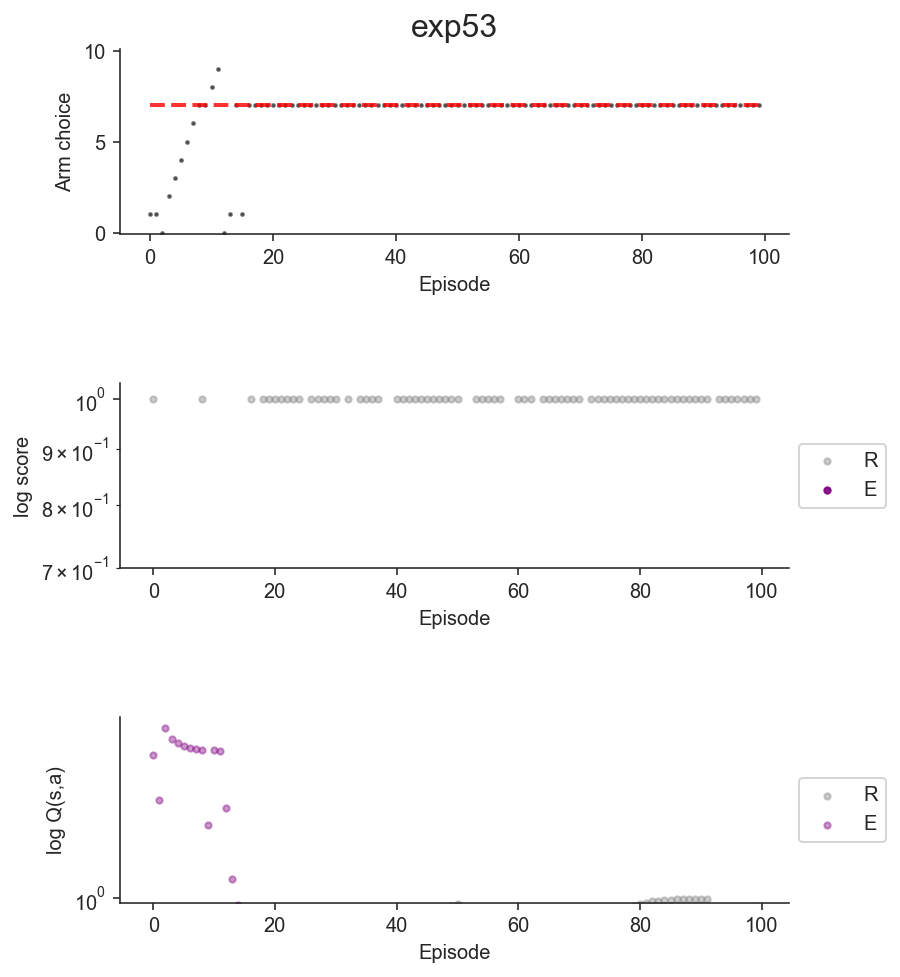

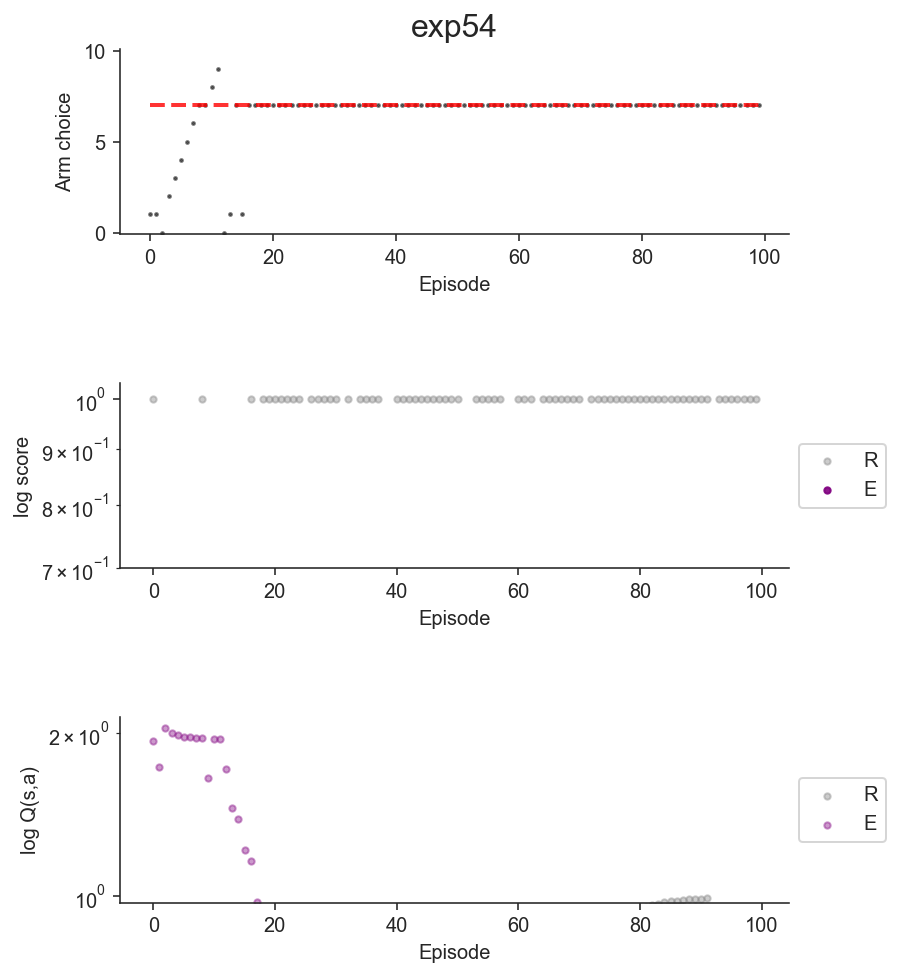

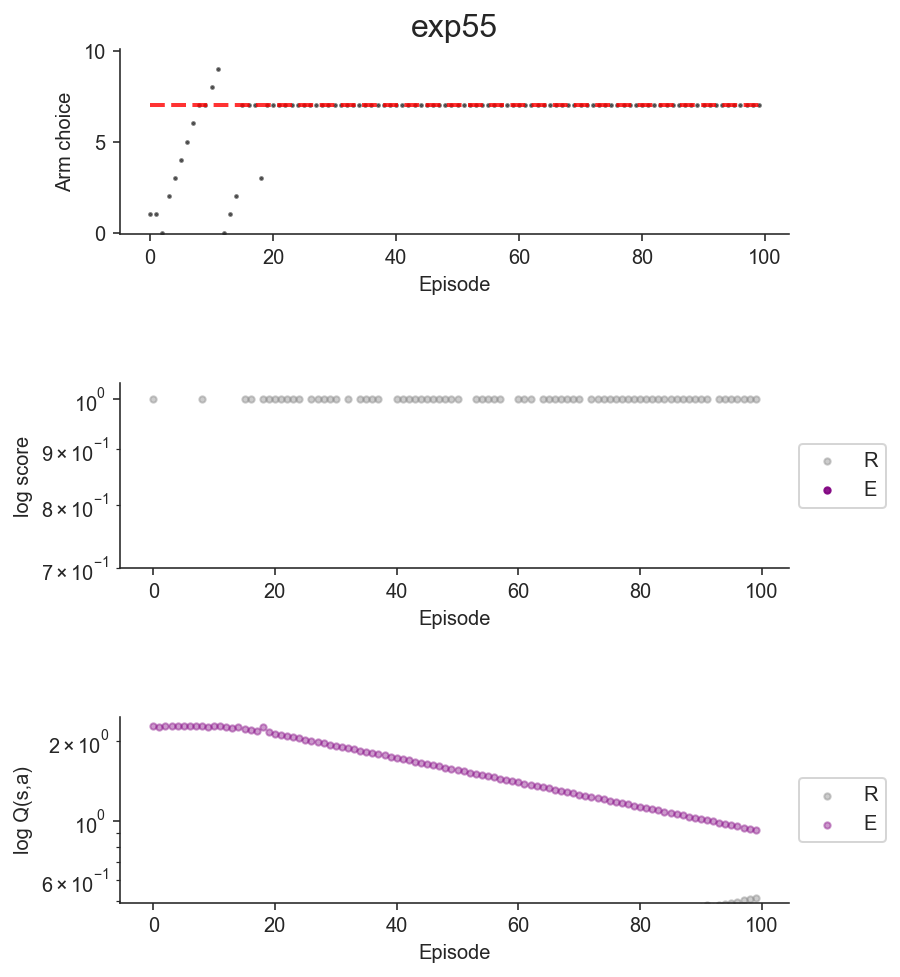

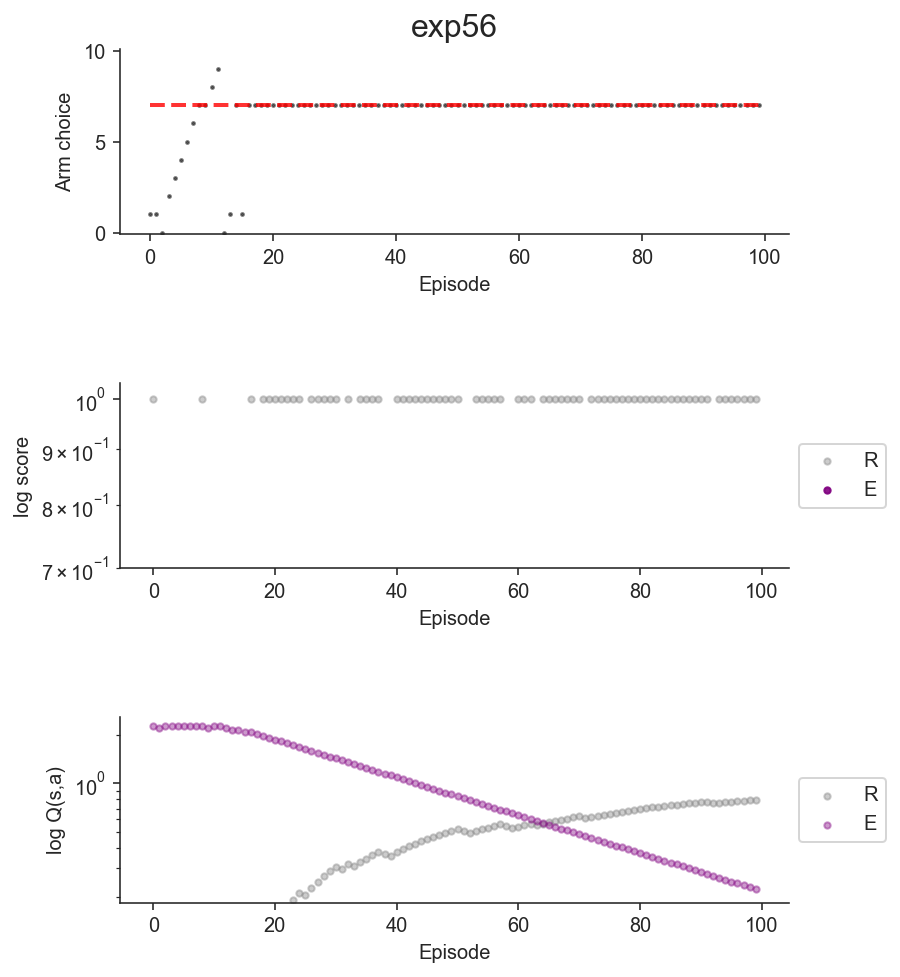

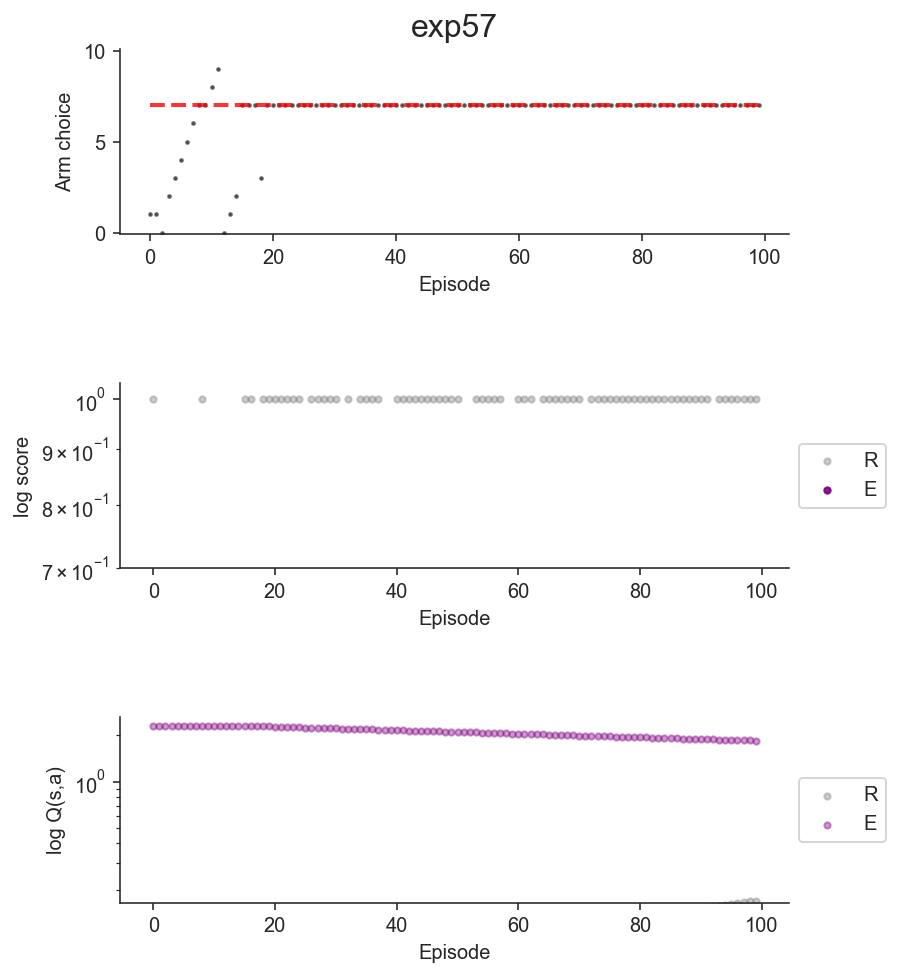

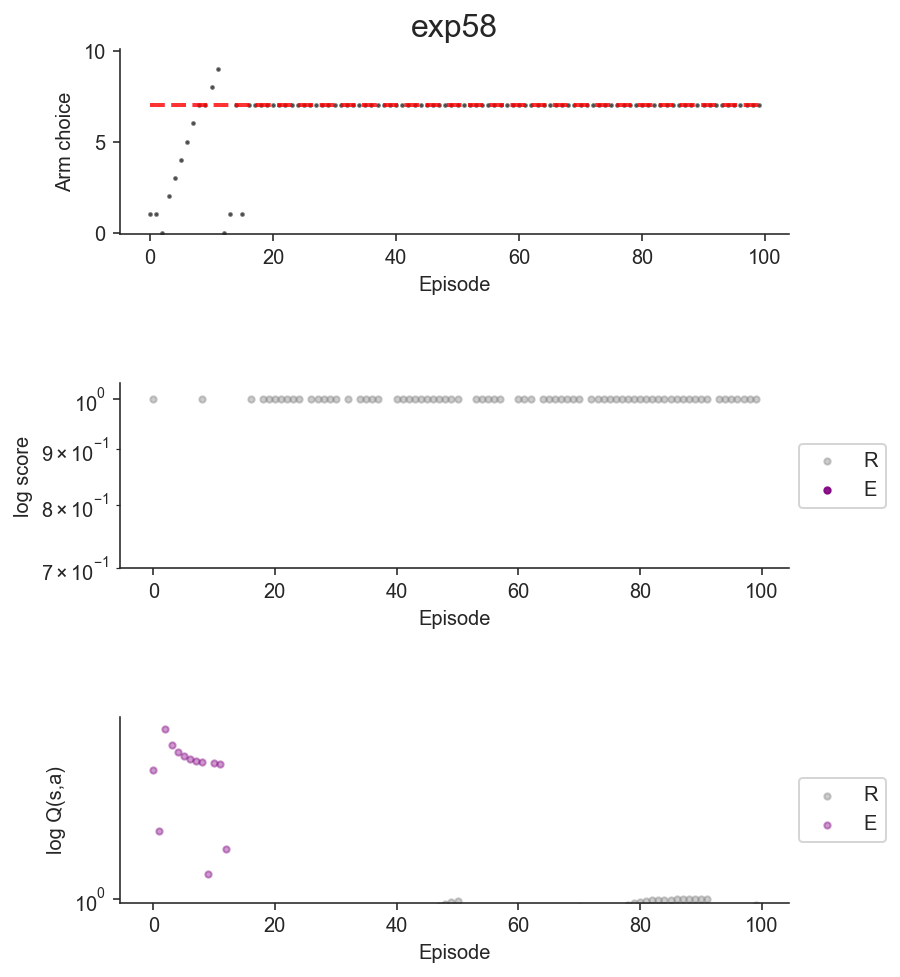

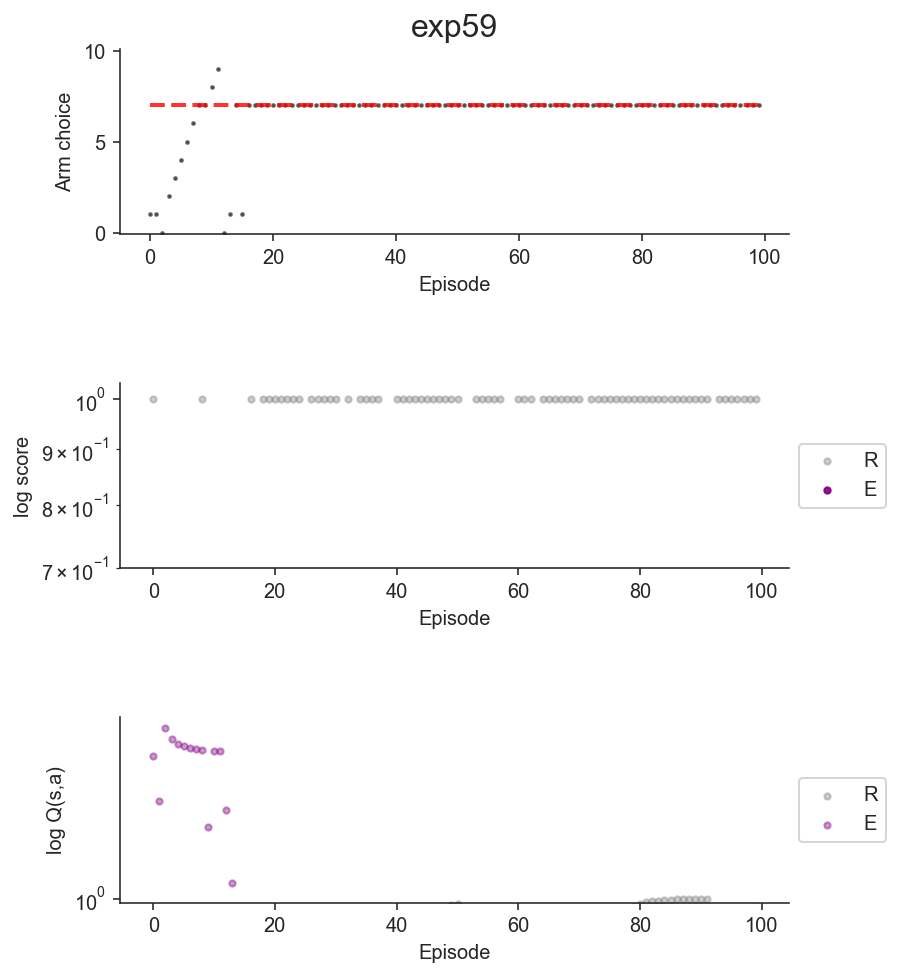

In [12]:
# Plot run
for exp_name, result in zip(exp_names, results):
    episodes = result["episodes"]
    actions =result["actions"]
    scores_R = result["scores_R"]
    values_R = result["values_R"]
    scores_E = result["scores_E"]
    values_E = result["values_E"]

    # Get some data from the gym...
    env = gym.make(env_name)
    best = env.env.best
    print(f"Best arm: {best}, last arm: {actions[-1]}")

    # Init plot
    fig = plt.figure(figsize=(6, 14))
    grid = plt.GridSpec(5, 1, wspace=0.3, hspace=0.8)

    # Do plots:
    # Arm
    plt.subplot(grid[0, 0])
    plt.title(exp_name)
    plt.scatter(episodes, actions, color="black", alpha=.5, s=2, label="Bandit")
    plt.plot(episodes, np.repeat(best, np.max(episodes)+1), 
             color="red", alpha=0.8, ls='--', linewidth=2)
    plt.ylim(-.1, np.max(actions)+1.1)
    plt.ylabel("Arm choice")
    plt.xlabel("Episode")

    # score
    plt.subplot(grid[1, 0])
    plt.scatter(episodes, scores_R, color="grey", alpha=0.4, s=10, label="R")
    plt.scatter(episodes, scores_E, color="purple", alpha=0.9, s=10, label="E")
    plt.ylabel("log score")
    plt.xlabel("Episode")
    plt.semilogy()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    _ = sns.despine()

    # Q
    plt.subplot(grid[2, 0])
    plt.scatter(episodes, values_R, color="grey", alpha=0.4, s=10, label="R")
    plt.scatter(episodes, values_E, color="purple", alpha=0.4, s=10, label="E")
    plt.ylabel("log Q(s,a)")
    plt.xlabel("Episode")
    plt.semilogy()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    _ = sns.despine()

    # -
    plt.savefig("figures/epsilon_bandit.pdf",  bbox_inches='tight')
    plt.savefig("figures/epsilon_bandit.eps",  bbox_inches='tight')

# Sensitivity

to parameter choices between all the different opt runs

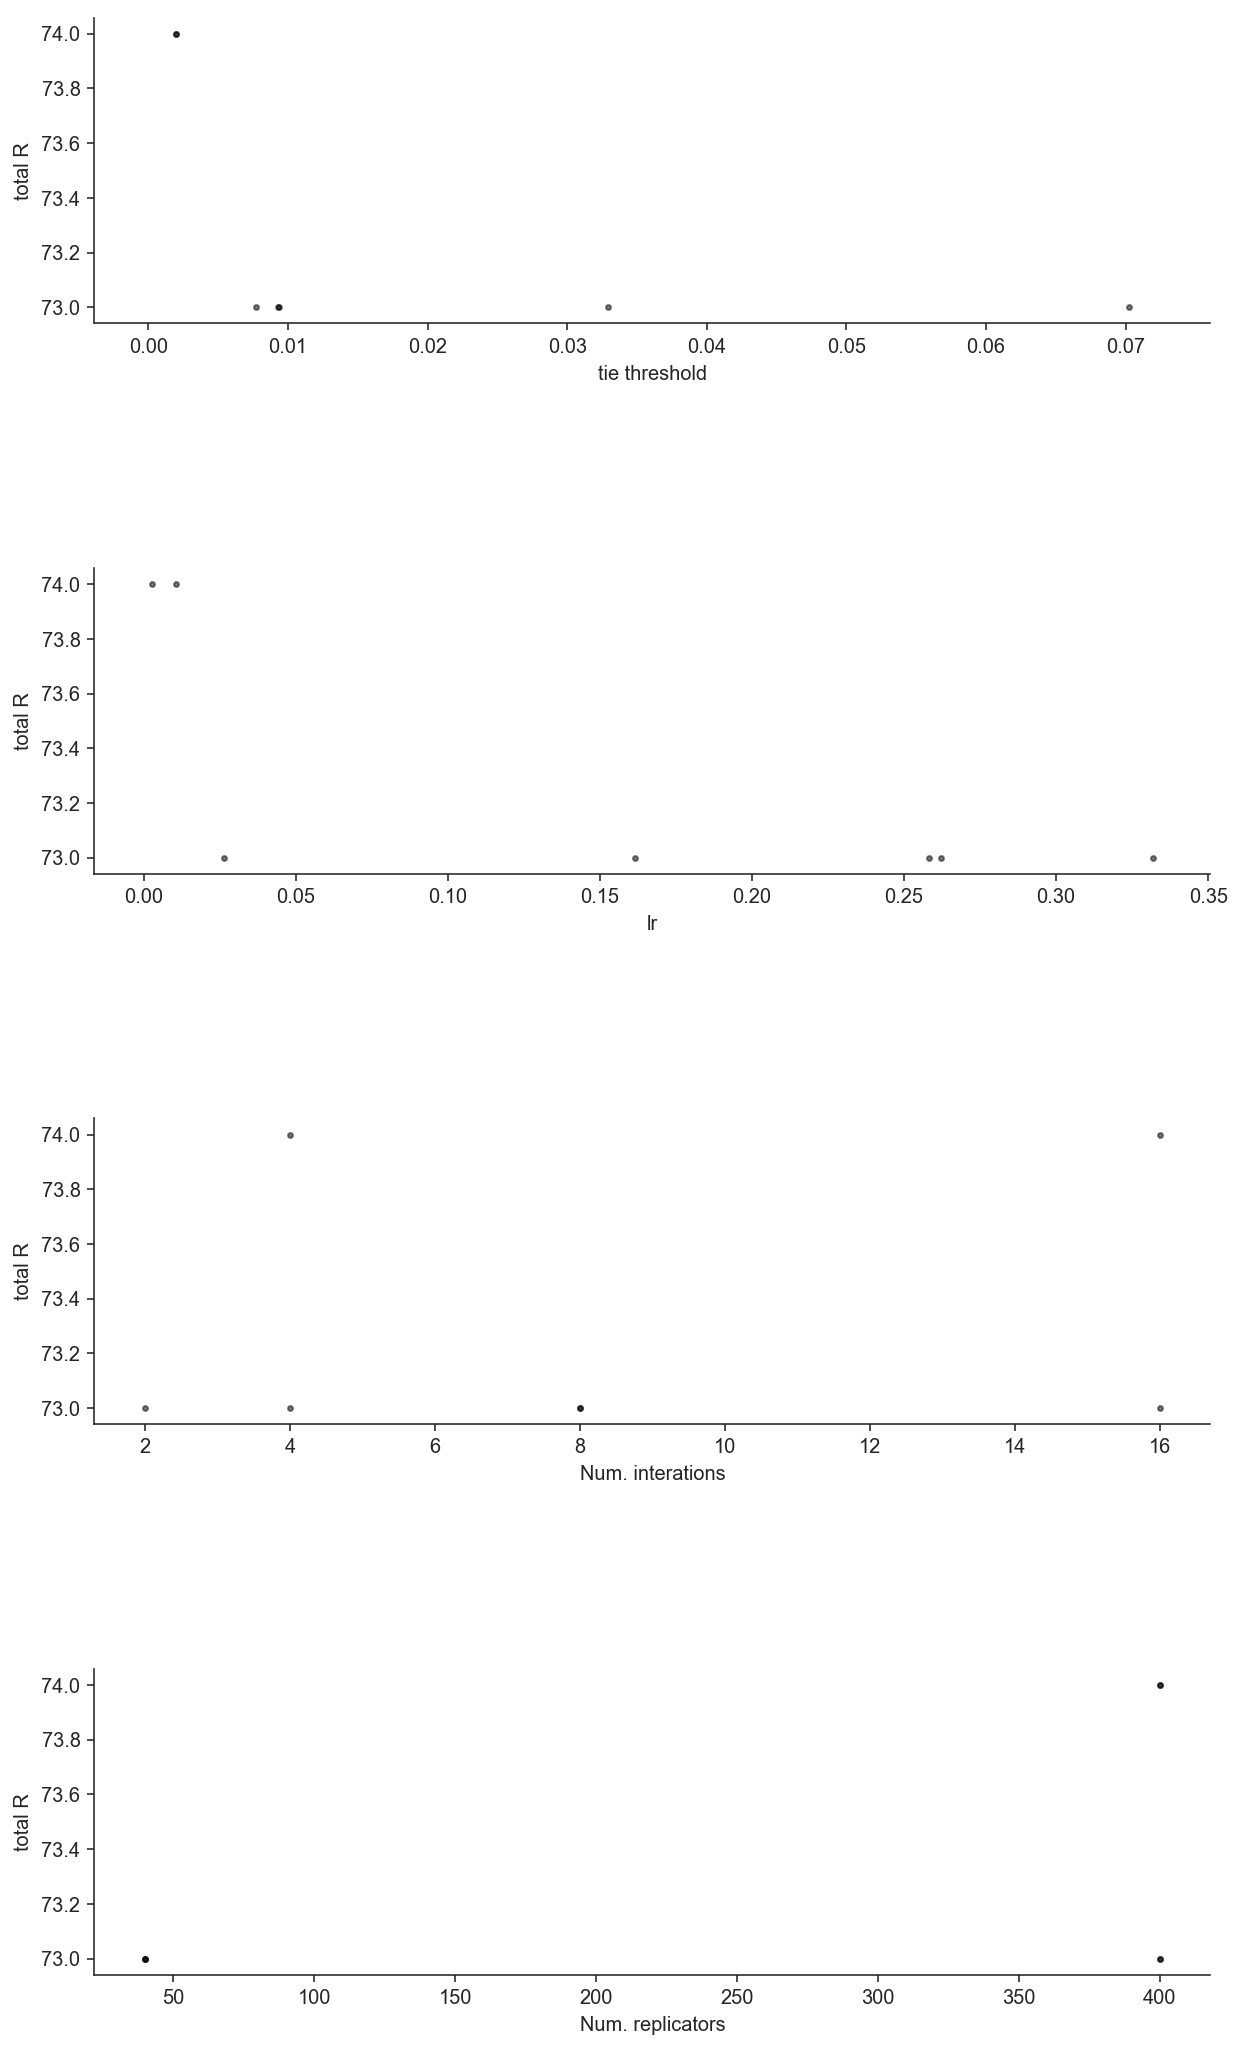

In [13]:
    # Init plot
fig = plt.figure(figsize=(10, 18))
grid = plt.GridSpec(4, 1, wspace=0.3, hspace=0.8)

# Do plots:
# Arm
plt.subplot(grid[0, 0])
plt.scatter(ties, total_Rs, color="black", alpha=.5, s=6, label="total R")
plt.xlabel("tie threshold")
plt.ylabel("total R")
_ = sns.despine()

plt.subplot(grid[1, 0])
plt.scatter(lrs, total_Rs, color="black", alpha=.5, s=6, label="total R")
plt.ylabel("total R")
plt.xlabel("lr")
_ = sns.despine()

plt.subplot(grid[2, 0])
plt.scatter(num_iterations, total_Rs, color="black", alpha=.5, s=6, label="total R")
plt.xlabel("Num. interations")
plt.ylabel("total R")
_ = sns.despine()

plt.subplot(grid[3, 0])
plt.scatter(num_replicators, total_Rs, color="black", alpha=.5, s=6, label="total R")
plt.xlabel("Num. replicators")
plt.ylabel("total R")
_ = sns.despine()

# Distributions

of parameters

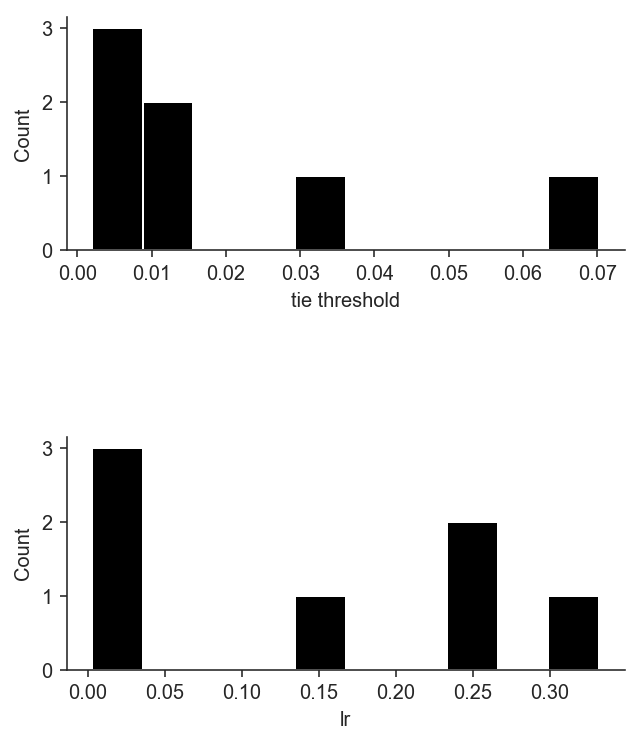

In [14]:
# Init plot
fig = plt.figure(figsize=(5, 6))
grid = plt.GridSpec(2, 1, wspace=0.3, hspace=0.8)

plt.subplot(grid[0, 0])
plt.hist(ties, color="black")
plt.xlabel("tie threshold")
plt.ylabel("Count")
_ = sns.despine()

plt.subplot(grid[1, 0])
plt.hist(lrs, color="black")
plt.xlabel("lr")
plt.ylabel("Count")
_ = sns.despine()

In [18]:
sorted(lrs)

[0.0026347871766753592,
 0.010566186893614903,
 0.026491483253719313,
 0.1614279017778434,
 0.25808687910003275,
 0.26228531939912914,
 0.3318698314514748]

In [19]:
sorted(ties)

[0.0019689062371460136,
 0.001969519206458025,
 0.007718153537453068,
 0.009272732601881432,
 0.009383899252538921,
 0.032940967878595837,
 0.07024629597387025]

of total reward

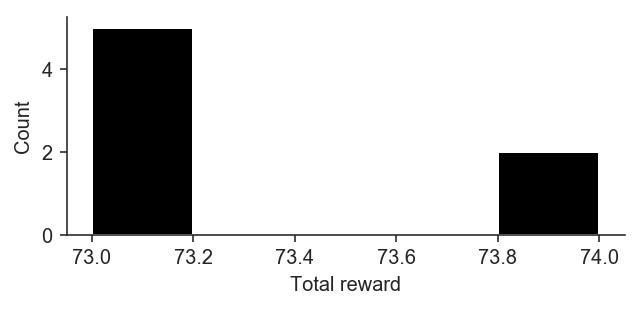

In [21]:
# Init plot
fig = plt.figure(figsize=(5, 2))
grid = plt.GridSpec(1, 1, wspace=0.3, hspace=0.8)

plt.subplot(grid[0, 0])
plt.hist(total_Rs, color="black", bins=5)
plt.xlabel("Total reward")
plt.ylabel("Count")
_ = sns.despine()

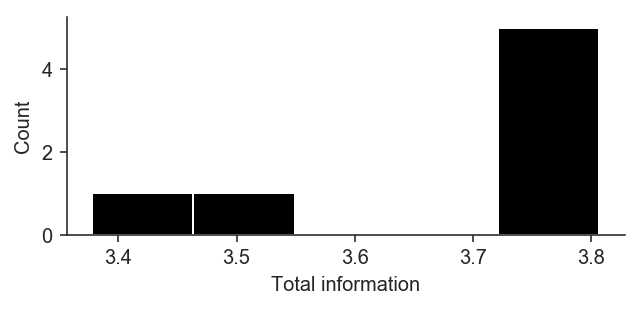

In [22]:
# Init plot
fig = plt.figure(figsize=(5, 2))
grid = plt.GridSpec(1, 1, wspace=0.3, hspace=0.8)

plt.subplot(grid[0, 0])
plt.hist(total_Es, color="black", bins=5)
plt.xlabel("Total information")
plt.ylabel("Count")
_ = sns.despine()

In [23]:
sorted(total_Rs), sorted(total_Es)

([73.0, 73.0, 73.0, 73.0, 73.0, 74.0, 74.0],
 [3.3776576630438973,
  3.524718169614719,
  3.7302080870735224,
  3.7622026329922518,
  3.763114240643761,
  3.796695717609004,
  3.806714078392016])